# Analytic Corner Flow Solution for a Rigid Dipping Slab

This notebook presents the calculation of the stress, stream function and velocity generated by a rigid dipping slab moving at a fixed velocity in a semi-infinite isoviscous fluid. The original solution is found in <i>Introduction to Fluid Dynamics</i> by Batchelor (1967). In 1969, Dan McKenzie used these equations to model the flow in the mantle driven by a sinking slab in his paper <i>On the Causes and Consequences of Plate Tectonics</i>. Later, in a paper title <i>Angle of Subduction</i> this analytic model for flow induced by the slab was used to argue that the average dip of slabs is determined by a balance between the weigh of the slab and flow-induced pressure on the slab (Stevenson & Turner, Nature, 1977).  

Professor Magali I. Billen<br>
Department of Earth and Planetary Sciences<br>
UC Davis<br>
February 15, 2018<br>

### Corner Flow Calculation of Constants

It is important to note that the geometry (and thus boundary conditions) used to find the solutions are different in Batchelor (1967) and McKenzie (1969). You can not mix the two, you must choose one geometry and solve for the constants with the appropriate boundary conditions.

I am writing this all out here because I don't want to ever have to re-do this solution by hand (I've done it at least 5 separate times since I was a graduate student... that seems like enough). 

I have included the relevant parts of McKenzie (1969) at the end of this notebook. Figure 5
shows the geometry. Note, the mantle wedge is region B and the sub-slab is region A. As this is drawn, the positive x axis is at point c, origin at b and negative x axis at point a. The y-axis is positive downwards.   Also, note that the angles are measured in opposite directions ($\theta_b$ is counter clockwise, $\theta_a$ is clockwise), and $\theta$ is also measured in opposite directions in the two different regions(this is important for applying the boundary conditions). 

The solution to the flow (conservation of mass and momentum subject to incompressibility) is found by expressing the velocity in terms of a stream function:
$$ v = (v_z, \frac{1}{r}\frac{d\psi}{d\theta}, -\frac{d\psi}{dr})$$
Assuming $v_z=0$ everywhere, then the PDE for the flow, becomes $\nabla^4\psi=0$. Defining, $\psi = rf(\theta)$ and substituting, the PDE becomes:
$$\frac{d^4f}{d\theta^4} + 2\frac{d^2f}{d\theta^2} + f = 0$$
The solution to this PDE is:
$$ f(\theta) = A\sin\theta + B\cos\theta + C\theta\sin\theta + D\theta\cos\theta$$
Note that this means that
$$v_r = \frac{df}{d\theta}$$
and
$$v_{\theta} = - f(\theta)$$
and 
$$\frac{df}{d\theta} = A\cos\theta -B\sin\theta + C(\sin\theta + \theta\cos\theta) + D(\cos\theta - \theta\sin\theta)$$
The geometry and boundary conditions are then used to find the constants A, B, C, and D.

For the geometry defined above, the boundary conditions in region A are:

on $\theta = 0$, $v_r = -v$ and $v_{\theta} = 0$

on $\theta = \theta_a$, $v_r = v$ and $v_{\theta} = 0$

In region B:

on $\theta = 0$, $v_r = 0$ and $v_{\theta} = 0$

on $\theta = \theta_b$, $v_r = v$ and $v_{\theta} = 0$

The constants found using these boundary conditions in region A are:

$A = \frac{-v\theta_a}{\sin\theta_a + \theta_a}$

$B = 0$

$C = \frac{v(1+\cos\theta_a) }{\sin\theta_a + \theta_a}$

$D = \frac{-v\sin\theta_a }{\sin\theta_a + \theta_a}$

and in region B:

$A = \frac{v \theta_b sin\theta_b}{\theta_b^2 - \sin^2\theta_b}$

$B = 0$

$C = \frac{-v (\sin\theta_b - \theta_b\cos\theta_b) }{\theta_b^2 - \sin^2\theta_b}$

$D = \frac{-v \theta_b sin\theta_b}{\theta_b^2 - \sin^2\theta_b}$

These constants have been check against the equations for the stream function given in McKenzie (1969). 

The shear stresses are given by 

$\sigma_{r\theta} = \frac{2\eta}{r}(C\cos\theta - D\sin\theta)$

I have also checked this against the stress equations in McKenzie (1969). Note, there is a typo in equation 3.17, the term $\cos(\theta_a)$ in the numerator should be $\cos(\theta)$. This is correct in the pressure equations given by Stevenson and Turner (Nature, 1977). The solution has also been check against the figure in McKenzie (1969).

Finally, the dynamic (flow-induced) pressure in the mantle is just the shear stress ($P=\sigma_{r\theta}$, because $\sigma_{rr} = \sigma_{\theta\theta} = 0$. The pressure is used in the paper by Stevenson and Turner (Nature, 1977) to estimate the steady-state dip of slabs.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Plot on a figure
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 12

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"


thb 0.7853981633974483 tha 2.356194490192345


Text(0.5,1,'Flow and Streamlines')

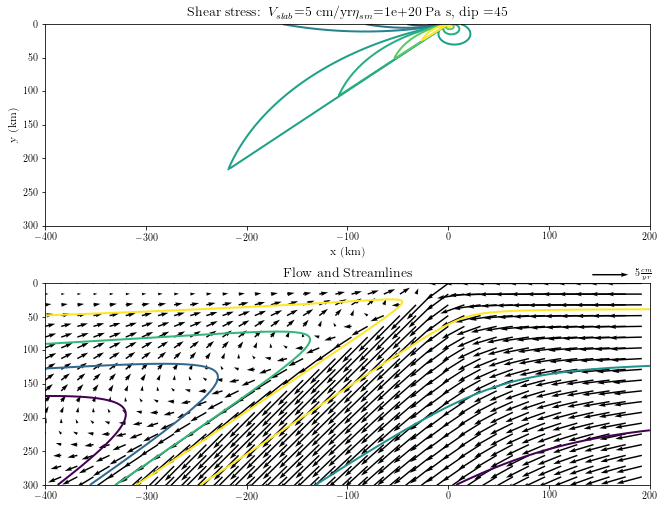

In [2]:
# Conversion constants
d2r = np.pi/180
sec2yr = 60*60*24*365  # sec to yr
pa2bar = 1e-5

# Parameters that need to be defined for each slab
dip = 45  # degrees
vslabcmyr = 5 # cm/yr
etaslabm = 1e20  # Pa s

vslab = vslabcmyr/100/sec2yr  # m/s

# Set up geometry
thb = dip*d2r # Region B (mantle wedge above slab)
tha = (180-dip)*d2r  # Regiona A (below slab)
print("thb", thb, "tha", tha)

# Set-up Mesh
dx = 2; # km

x = np.arange(-400,200+dx,dx) # km
y = np.arange(0.1,300+dx,dx) # km
[X,Y] = np.meshgrid(x,y)

# Convert to Polar coordinates
R = np.sqrt(X**2 + Y**2)*1000  # meters, same for region A and B
TH = np.arccos(-X/(np.sqrt(X**2 + Y**2))) # for region B with negative X values
THM = np.pi - TH # for region A with positive X values reverse theta.

# Indices defining the two regions
pb = (TH<thb).nonzero()
pa = (TH>=thb).nonzero()

# Initialize matrices
sig = np.zeros(np.shape(R))  # shear stress \sigma_{r\theta}
urB = np.zeros(np.shape(R))   # r-components of velocity
uthB = np.zeros(np.shape(R))   # th-components of velocity
urA = np.zeros(np.shape(R))   # r-components of velocity
uthA = np.zeros(np.shape(R))   # th-components of velocity
Ux = np.zeros(np.shape(R))   # x-components of velocity
Uy = np.zeros(np.shape(R))   # y-components of velocity
psiB = np.zeros(np.shape(R))  # stream function in region B
psiA = np.zeros(np.shape(R))   # stream function in region A

# In Region B: mantle wedge
Vcon = vslab/(thb**2 - (np.sin(thb))**2)
A = Vcon*thb*np.sin(thb)
B = 0
C = -Vcon*(np.sin(thb) - thb*np.cos(thb))
D = -Vcon*thb*np.sin(thb)
M = 2*etaslabm

# Shear stress
sig[pb] = M*(C*np.cos(TH[pb])-D*np.sin(TH[pb]))/R[pb]
# Velocity components
urB = A*np.cos(TH) - B*np.sin(TH) + C*(np.sin(TH) + TH*np.cos(TH)) + D*(np.cos(TH) 
                                                                        - TH*np.sin(TH))
uthB = -(A*np.sin(TH) + B*np.cos(TH) + C*TH*np.sin(TH) + D*TH*np.cos(TH))
psiB[pb] = -R[pb]*uthB[pb]
# convert to x-y components
Ux[pb] = -urB[pb]*np.cos(TH[pb]) - uthB[pb]*np.sin(TH[pb])
Uy[pb] = -urB[pb]*np.sin(TH[pb]) + uthB[pb]*np.cos(TH[pb])

# In Region A: below the slab
Vcon2 = vslab/(np.sin(tha) + tha)
E = -Vcon2*tha
F = 0
G = Vcon2*(1 + np.cos(tha))
H = -Vcon2*np.sin(tha)

# Shear stress
sig[pa] = M*(G*np.cos(THM[pa])-H*np.sin(THM[pa]))/R[pa]
# Velocity components
urA = E*np.cos(THM) - F*np.sin(THM) + G*(np.sin(THM) + THM*np.cos(THM)) + H*(np.cos(THM)                                                                              - THM*np.sin(THM))
uthA = -(E*np.sin(THM) + F*np.cos(THM) + G*THM*np.sin(THM) + H*THM*np.cos(THM))
psiA[pa] = -R[pa]*uthA[pa]

Ux[pa] = urA[pa]*np.cos(THM[pa]) - uthA[pa]*np.sin(THM[pa])
Uy[pa] = -urA[pa]*np.sin(THM[pa]) - uthA[pa]*np.cos(THM[pa])

Ux = Ux*100*sec2yr
Uy = Uy*100*sec2yr
# Make figure
fig = plt.figure()  #(figsize=(12,4), dpi=100)
                
axes1 = fig.add_axes([0.1, 1.1, 1.4, 0.7]) # left, bottom, width, height (range 0 to 1)
levels = [-200, -100, -50, -25, 25, 50, 100, 200]
cf = axes1.contour(X,Y,sig*pa2bar,levels)
axes1.set_ylim(axes1.get_ylim()[::-1])
axes1.set_xlabel('x (km)')
axes1.set_ylabel('y (km)')
etasmtext = "%4.2g" % etaslabm
vtext = '$V_{slab}$=' + str(vslabcmyr) + ' cm/yr' 
etatext = '$\eta_{sm}$=' + etasmtext + ' Pa s, '
diptext = 'dip =' + str(dip)
titletext = "Shear stress: " + vtext + etatext + diptext
axes1.set_title(titletext)
#cb = fig.colorbar(cf,ax=axes1)

axes4 = fig.add_axes([0.1, 0.2, 1.4, 0.7]) # left, bottom, width, height (range 0 to 1)
cf4 = axes4.contour(X,Y,psiB*1e5,[-7, -5, -3, -1])
cf5 = axes4.contour(X,Y,psiA*1e5, [-30, -18, -6])
dd = 8
qv = axes4.quiver(X[::dd,::dd],Y[::dd,::dd],Ux[::dd,::dd],Uy[::dd,::dd],
                  scale = 10, scale_units='inches')
qk = plt.quiverkey(qv, 1.45, 0.93, 5, r'$5 \frac{cm}{yr}$', labelpos='E',
                   coordinates='figure')
axes4.set_ylim(axes4.get_ylim()[::-1])
axes4.set_title("Flow and Streamlines")


### McKenzie, D. P. (GJRAS, 1969), pages 13-15 and figure 7

<img src = files/mckenzie_gjras69_p13.png>

<img src = files/mckenzie_gjras69_p14.png>

<img src = files/mckenzie_gjras69_p15.png>

<img src = files/mckenzie_gjras69_fig7stress.png>